In [1]:
import os
import common

# Assign notebook and folder names
notebook_name = '05_pca_vs_ica'
figure_folder = os.path.join(common.FIGURE_FOLDER, notebook_name)
data_folder = os.path.join(common.DATA_FOLDER, notebook_name)

# Make the folders
! mkdir -p $figure_folder
! mkdir -p $data_folder

In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [3]:
input_folder = os.path.join(common.DATA_FOLDER, '001_downsample_macosko_data')

csv = os.path.join(input_folder, 'expression_table1_subset.csv')

table1 = pd.read_csv(csv, index_col=0)
print(table1.shape)
table1.head()

(300, 259)


,RHO,GNAT1,SLC24A1,PDE6B,PDC,CNGA1,RP1,SAG,NR2E3,NRL,...,SLC6A6,MAP1B,TMA7,STX3,SYT1,CRX,SNAP25,MPP4,NEUROD1,A930011O12RIK
barcode,,,,,,,,,,,,,,,,,,,,,
r1_TTCCTGCTAGGC,14,3,1,3,12,0,1,7,2,2,...,1,1,2,0,0,0,0,1,0,0
r1_TGGAGATACTCT,23,8,6,4,13,9,2,19,1,1,...,3,0,2,1,0,1,0,2,0,1
r1_CGTCTACATCCG,14,4,7,1,6,3,0,13,2,2,...,0,1,0,3,0,1,0,2,0,0
r1_CAAGCTTGGCGC,62,18,10,20,29,2,8,31,9,2,...,0,5,7,3,2,6,2,3,7,11
r1_ACTCACATAGAG,10,1,0,1,5,2,1,7,3,1,...,1,1,2,3,1,2,1,0,3,0


In [4]:
input_folder = os.path.join(common.DATA_FOLDER, '002_robust_pca')

csv = os.path.join(input_folder, 'lowrank.csv')

lowrank = pd.read_csv(csv, index_col=0)
print(lowrank.shape)
lowrank.head()

(300, 259)


,RHO,GNAT1,SLC24A1,PDE6B,PDC,CNGA1,RP1,SAG,NR2E3,NRL,...,SLC6A6,MAP1B,TMA7,STX3,SYT1,CRX,SNAP25,MPP4,NEUROD1,A930011O12RIK
barcode,,,,,,,,,,,,,,,,,,,,,
r1_TTCCTGCTAGGC,2.107094,1.557394,0.807730,1.053738,2.056140,0.772676,1.148585,2.274124,0.939969,0.769930,...,0.386077,0.616134,0.590651,0.551323,0.581623,0.549251,0.498720,0.622783,0.980489,0.597849
r1_TGGAGATACTCT,3.564449,2.631513,1.362509,1.778671,3.479139,1.303118,1.941908,3.850221,1.586342,1.299321,...,0.662193,1.049206,1.001763,0.943025,0.995895,0.933101,0.854436,1.058849,1.666429,1.015786
r1_CGTCTACATCCG,2.829169,2.088554,1.081298,1.411538,2.761437,1.034065,1.541298,3.056093,1.258905,1.031110,...,0.526003,0.832973,0.795049,0.749016,0.791121,0.740852,0.678725,0.840589,1.323006,0.806466
r1_CAAGCTTGGCGC,6.462507,4.735729,2.429696,3.185960,6.309599,2.324588,3.504922,7.006445,2.838329,2.324829,...,1.293263,1.975855,1.850447,1.812795,1.933828,1.724248,1.668428,1.969213,3.102769,1.887946
r1_ACTCACATAGAG,2.097722,1.549264,0.802647,1.047497,2.047217,0.767650,1.143032,2.265178,0.934300,0.765252,...,0.387953,0.616088,0.588936,0.552997,0.583952,0.548329,0.500862,0.621944,0.979270,0.596974


## Assign colors based on clusters

In [5]:
cluster_identities = pd.read_table('macosko2015/retina_clusteridentities.txt', header=None,
                                   names=['barcode', 'cluster_id'], index_col=0, squeeze=True)
print(cluster_identities.shape)
cluster_identities.head()

(44808,)


barcode
r1_GGCCGCAGTCCG     2
r1_CTTGTGCGGGAA     2
r1_GCGCAACTGCTC     2
r1_GATTGGGAGGCA     2
r1_GTGCCGCCTCTC    25
Name: cluster_id, dtype: int64

In [6]:
cluster_identities_lowrank = cluster_identities.loc[lowrank.index]
cluster_identities_lowrank.head()

barcode
r1_TTCCTGCTAGGC    24
r1_TGGAGATACTCT    24
r1_CGTCTACATCCG    24
r1_CAAGCTTGGCGC    24
r1_ACTCACATAGAG    24
Name: cluster_id, dtype: int64

In [7]:
cluster_ids = cluster_identities_lowrank.unique()
cluster_ids

array([24, 25, 26, 27, 33, 34])

In [8]:
cluster_id_to_name = {24: 'Rods', 25: 'Cones', 26: 'Bipolar cells (group1)', 27: 'Bipolar cells (group2)', 
                      33: 'Bipolar cells (group3)', 34: 'Muller glia'}

In [9]:
cluster_names_lowrank = cluster_identities_lowrank.map(cluster_id_to_name)
cluster_names_lowrank.head()

barcode
r1_TTCCTGCTAGGC    Rods
r1_TGGAGATACTCT    Rods
r1_CGTCTACATCCG    Rods
r1_CAAGCTTGGCGC    Rods
r1_ACTCACATAGAG    Rods
Name: cluster_id, dtype: object

In [11]:
colors = sns.color_palette(palette='Set2', n_colors=len(cluster_ids))
id_to_color = dict(zip(cluster_ids, colors))

color_labels = [id_to_color[i] for i in cluster_identities_lowrank]
color_labels[:4]

[(0.40000000000000002, 0.76078431372549016, 0.6470588235294118),
 (0.40000000000000002, 0.76078431372549016, 0.6470588235294118),
 (0.40000000000000002, 0.76078431372549016, 0.6470588235294118),
 (0.40000000000000002, 0.76078431372549016, 0.6470588235294118)]

In [32]:
cluster_names_to_color = dict((cluster_id_to_name[i], id_to_color[i]) for i in cluster_ids)
cluster_names_to_color

{'Bipolar cells (group1)': (0.55294117647058827,
  0.62745098039215685,
  0.79607843137254897),
 'Bipolar cells (group2)': (0.90588235294117647,
  0.54117647058823526,
  0.76470588235294112),
 'Bipolar cells (group3)': (0.65098039215686276,
  0.84705882352941175,
  0.32941176470588235),
 'Cones': (0.9882352941176471, 0.55294117647058827, 0.3843137254901961),
 'Muller glia': (1.0, 0.85098039215686272, 0.18431372549019609),
 'Rods': (0.40000000000000002, 0.76078431372549016, 0.6470588235294118)}

## Plot the low rank data

In [12]:
sns.set(style='whitegrid')

[<matplotlib.text.Text at 0x12923bda0>, <matplotlib.text.Text at 0x128e0a898>]

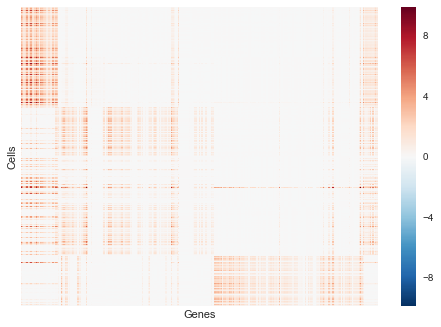

In [84]:
fig, ax = plt.subplots()
sns.heatmap(lowrank, xticklabels=[], yticklabels=[])
ax.set(xlabel='Genes', ylabel='Cells')

### Maybe this is small enough for a clustered heatmap

/Users/olgabot/anaconda3/envs/cshl-sca-2017/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


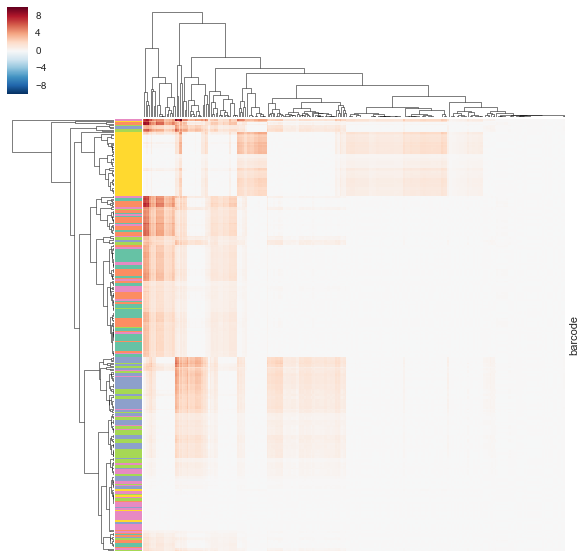

In [16]:
clustergrid = sns.clustermap(lowrank, mask=mask, xticklabels=[], yticklabels=[], 
                             row_colors=color_labels)

In [13]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components=6)

reduced = pd.DataFrame(ica.fit_transform(lowrank), index=lowrank.index)
reduced.head()

,0,1,2,3,4,5
barcode,,,,,,
r1_TTCCTGCTAGGC,-0.017281,0.047082,-0.046493,0.044163,0.026868,0.025426
r1_TGGAGATACTCT,-0.017581,0.051352,-0.096292,0.024597,0.018292,0.013639
r1_CGTCTACATCCG,-0.025346,0.045580,-0.067072,0.017563,0.019891,0.019199
r1_CAAGCTTGGCGC,-0.021076,-0.064964,-0.130531,-0.035461,-0.000332,-0.008107
r1_ACTCACATAGAG,-0.024881,0.042757,-0.041752,0.027513,0.024378,0.025131


In [14]:
component_norms = reduced.apply(np.linalg.norm).sort_values(ascending=False)
component_norms

2    1.0
1    1.0
5    1.0
0    1.0
4    1.0
3    1.0
dtype: float64

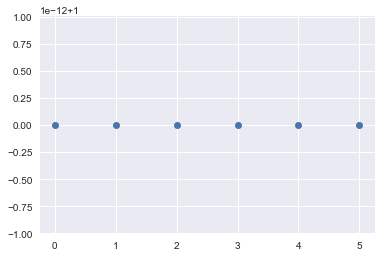

In [15]:
plt.plot(np.arange(len(component_norms)), component_norms, 'o')

In [16]:
reduced = reduced[component_norms.index]
reduced.head()

,2,1,5,0,4,3
barcode,,,,,,
r1_TTCCTGCTAGGC,-0.046493,0.047082,0.025426,-0.017281,0.026868,0.044163
r1_TGGAGATACTCT,-0.096292,0.051352,0.013639,-0.017581,0.018292,0.024597
r1_CGTCTACATCCG,-0.067072,0.045580,0.019199,-0.025346,0.019891,0.017563
r1_CAAGCTTGGCGC,-0.130531,-0.064964,-0.008107,-0.021076,-0.000332,-0.035461
r1_ACTCACATAGAG,-0.041752,0.042757,0.025131,-0.024881,0.024378,0.027513


In [17]:
reduced_names = reduced.join(cluster_names_lowrank)
reduced_names.head()

,2,1,5,0,4,3,cluster_id
barcode,,,,,,,
r1_TTCCTGCTAGGC,-0.046493,0.047082,0.025426,-0.017281,0.026868,0.044163,Rods
r1_TGGAGATACTCT,-0.096292,0.051352,0.013639,-0.017581,0.018292,0.024597,Rods
r1_CGTCTACATCCG,-0.067072,0.045580,0.019199,-0.025346,0.019891,0.017563,Rods
r1_CAAGCTTGGCGC,-0.130531,-0.064964,-0.008107,-0.021076,-0.000332,-0.035461,Rods
r1_ACTCACATAGAG,-0.041752,0.042757,0.025131,-0.024881,0.024378,0.027513,Rods


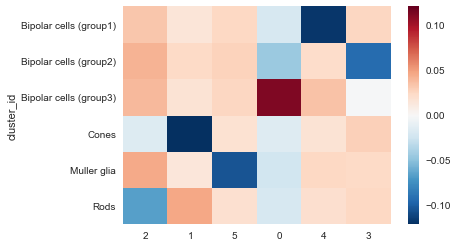

In [19]:
sns.heatmap(reduced_names.groupby('cluster_id').median())

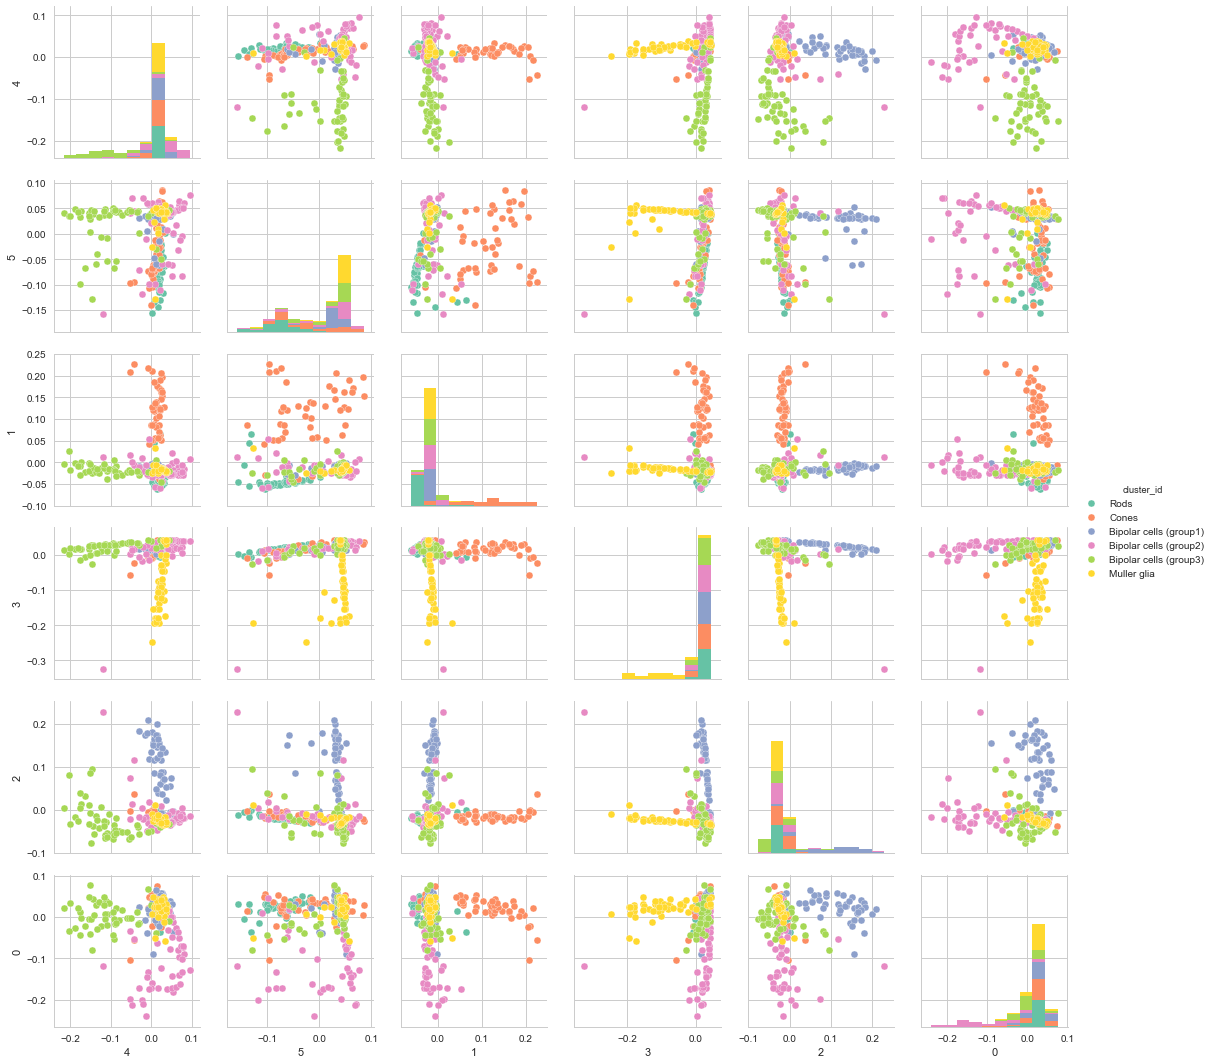

In [101]:
sns.pairplot(reduced_names, hue='cluster_id', palette=cluster_names_to_color)

In [89]:
ica_components = pd.DataFrame(ica.components_, columns=lowrank.columns)
print(ica_components.shape)
ica_components.head()

(6, 259)


,RHO,GNAT1,SLC24A1,PDE6B,PDC,CNGA1,RP1,SAG,NR2E3,NRL,...,SLC6A6,MAP1B,TMA7,STX3,SYT1,CRX,SNAP25,MPP4,NEUROD1,A930011O12RIK
0,0.050505,0.048688,0.051475,0.032922,-0.001720,0.027235,0.027126,-0.001834,0.035298,0.024644,...,-0.042106,-0.050606,-0.046519,-0.035074,0.008691,-0.017919,-0.006807,-0.067759,-0.011596,-0.000858
1,-0.010744,-0.011213,-0.008328,-0.019160,-0.013628,-0.020105,-0.004159,-0.008439,-0.016243,-0.015508,...,0.015240,-0.004480,-0.022567,0.024237,0.032721,0.013698,0.022497,-0.000798,0.006728,0.007369
2,0.056020,0.049924,0.056653,-0.007357,-0.028842,-0.022705,0.039446,-0.013762,0.005357,-0.009711,...,-0.021280,-0.108222,-0.153687,0.023846,0.111879,0.030194,0.060665,-0.094987,-0.011357,0.022221
3,-0.018848,-0.016249,-0.017150,0.003296,0.006208,0.008822,-0.013986,0.001988,-0.000734,0.003916,...,0.007825,0.039505,0.051376,-0.008005,-0.034071,-0.013715,-0.020567,0.025608,0.009547,-0.006761
4,-0.005825,-0.005053,-0.005657,-0.001225,0.001956,-0.000173,-0.003313,0.000882,-0.002049,-0.000688,...,0.002521,0.007171,0.010216,-0.000166,-0.007556,-0.000389,-0.003378,0.009009,-0.000332,-0.001525


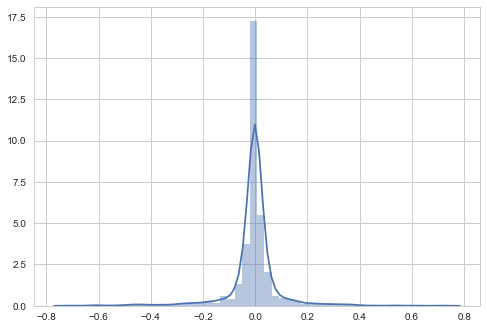

In [91]:
sns.distplot(ica_components.values.flat)

## What about plain old PCA?

In [22]:
from sklearn.decomposition import PCA
pca = PCA()
pca_reduced = pd.DataFrame(pca.fit_transform(lowrank), index=lowrank.index)
pca_reduced.head()

,0,1,2,3,4,5,6,7,8,9,...,249,250,251,252,253,254,255,256,257,258
barcode,,,,,,,,,,,,,,,,,,,,,
r1_TTCCTGCTAGGC,2.016365,-3.082168,-2.008168,-0.197335,-0.132597,-0.008867,3.950665e-14,1.818672e-14,-1.025019e-14,4.136603e-15,...,8.028969e-17,-1.490587e-16,-2.518648e-16,-4.396792e-17,-9.250631e-17,-5.428418e-17,-6.933617e-17,1.060000e-15,2.228168e-16,3.487098e-16
r1_TGGAGATACTCT,6.926507,-2.421480,-0.808254,-0.247768,-0.191300,-0.004699,-2.852697e-14,1.705282e-14,2.040679e-15,-4.399704e-15,...,-3.546638e-17,-5.397391e-17,4.788619e-17,8.364647e-18,9.656126e-17,-1.009183e-16,6.690166e-17,1.235923e-15,-3.243360e-16,-3.199985e-16
r1_CGTCTACATCCG,4.453695,-2.744673,-1.408121,-0.211491,-0.146644,-0.002034,-6.070872e-16,-4.277527e-15,-2.317508e-15,-8.725150e-15,...,-1.374832e-16,9.535285e-17,-2.410900e-16,9.143571e-18,-1.875402e-16,8.684627e-17,-8.596237e-17,8.657653e-16,1.409920e-15,-6.613824e-17
r1_CAAGCTTGGCGC,16.780411,-0.735881,1.754018,-0.054682,0.013814,0.006292,-1.176347e-14,9.579850e-15,-4.885728e-15,1.696122e-14,...,7.998233e-17,2.215946e-17,-1.039295e-16,4.281491e-17,-3.677119e-17,1.014838e-16,6.715735e-17,1.346684e-15,2.863966e-16,3.439058e-17
r1_ACTCACATAGAG,1.990009,-3.074045,-2.009732,-0.183536,-0.115751,-0.004209,1.468397e-15,-2.317685e-15,6.186075e-16,1.090401e-15,...,-4.065115e-17,3.152358e-16,7.185775e-17,9.565203e-17,2.943767e-16,-4.617675e-17,-2.513610e-16,-7.147581e-19,2.212935e-16,-1.636018e-16


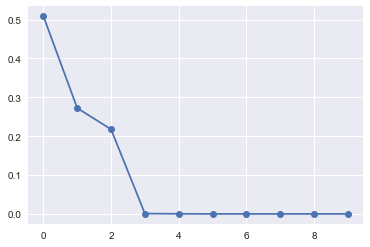

In [23]:
plt.plot(pca.explained_variance_ratio_[:10], 'o-')

In [24]:
pca_reduced_subset = pca_reduced.loc[:, :5]

In [25]:
pca_reduced_names = pca_reduced_subset.join(cluster_names_lowrank)
pca_reduced_names.head()

,0,1,2,3,4,5,cluster_id
barcode,,,,,,,
r1_TTCCTGCTAGGC,2.016365,-3.082168,-2.008168,-0.197335,-0.132597,-0.008867,Rods
r1_TGGAGATACTCT,6.926507,-2.421480,-0.808254,-0.247768,-0.191300,-0.004699,Rods
r1_CGTCTACATCCG,4.453695,-2.744673,-1.408121,-0.211491,-0.146644,-0.002034,Rods
r1_CAAGCTTGGCGC,16.780411,-0.735881,1.754018,-0.054682,0.013814,0.006292,Rods
r1_ACTCACATAGAG,1.990009,-3.074045,-2.009732,-0.183536,-0.115751,-0.004209,Rods


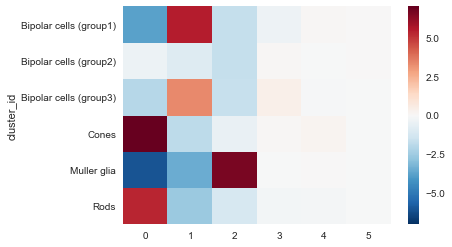

In [26]:
sns.heatmap(pca_reduced_names.groupby('cluster_id').mean())

In [27]:
sns.pairplot(pca_reduced_names, hue='cluster_id', 
             palette=cluster_names_to_color)

NameError: name 'cluster_names_to_color' is not defined

In [53]:
matrix = np.array([[1, 1], [0, 2]]).astype(float).T
matrix

array([[ 1.,  0.],
       [ 1.,  2.]])

In [54]:
np.linalg.svd(matrix)

(array([[-0.22975292, -0.97324899],
        [-0.97324899,  0.22975292]]),
 array([ 2.28824561,  0.87403205]),
 array([[-0.52573111, -0.85065081],
        [-0.85065081,  0.52573111]]))

In [55]:
pca0 = PCA()
ica0 = FastICA()

In [59]:
pcad = pca0.fit_transform(matrix)
pcad

array([[ 1.,  0.],
       [-1.,  0.]])

In [47]:
pca0.explained_variance_ratio_

array([  1.00000000e+00,   2.81351049e-34])

In [48]:
pca0.components_

array([[-0.70710678,  0.70710678],
       [-0.70710678, -0.70710678]])

In [49]:
matrix

array([[ 1.,  1.],
       [ 0.,  2.]])

In [50]:
%pdb

Automatic pdb calling has been turned OFF


In [51]:
icad = ica0.fit_transform(matrix)
icad

array([[-0.703125,  0.      ],
       [ 0.703125,  0.      ]])

## TSNE

In [128]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0, perplexity=120)

smushed = pd.DataFrame(tsne.fit_transform(reduced), index=lowrank.index)

# smushed = pd.DataFrame(tsne.fit_transform(pca_reduced.loc[:, :2]), index=lowrank.index)
smushed.head()

,0,1
barcode,,
r1_TTCCTGCTAGGC,9.451248,-0.661464
r1_TGGAGATACTCT,8.999652,2.190746
r1_CGTCTACATCCG,5.145081,-0.198609
r1_CAAGCTTGGCGC,11.408211,8.913246
r1_ACTCACATAGAG,0.572704,4.590956


In [129]:
smushed_names = smushed.join(cluster_names_lowrank)
smushed_names.head()

,0,1,cluster_id
barcode,,,
r1_TTCCTGCTAGGC,9.451248,-0.661464,Rods
r1_TGGAGATACTCT,8.999652,2.190746,Rods
r1_CGTCTACATCCG,5.145081,-0.198609,Rods
r1_CAAGCTTGGCGC,11.408211,8.913246,Rods
r1_ACTCACATAGAG,0.572704,4.590956,Rods


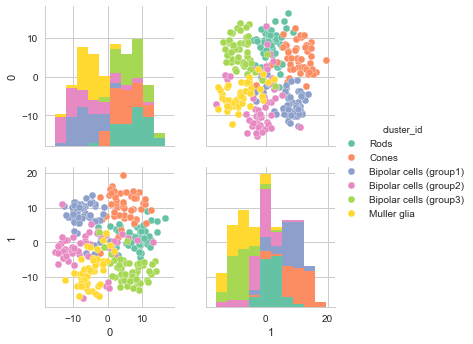

In [130]:
sns.pairplot(smushed_names, hue='cluster_id', palette=cluster_names_to_color)

In [14]:
rpca_alm.lmbda

0.057735026918962568

In [15]:
U, s, V = np.linalg.svd(rpca_alm.L)

In [16]:
U

array([[-0.04272573, -0.02831748, -0.00597595, ...,  0.00333803,
         0.00177218,  0.01580328],
       [-0.07864946, -0.04817703, -0.01001383, ..., -0.0114292 ,
         0.00301747,  0.00501156],
       [-0.05291033, -0.03174095, -0.00638981, ..., -0.00100707,
        -0.00933078,  0.01188982],
       ..., 
       [-0.01026694,  0.02322763, -0.03528178, ...,  0.03940001,
         0.00723089, -0.05019267],
       [-0.04240066,  0.0962479 , -0.13841497, ..., -0.00552324,
         0.00943978, -0.00371454],
       [-0.00583065,  0.02502047, -0.03610277, ..., -0.0189998 ,
        -0.03432167,  0.05701413]])

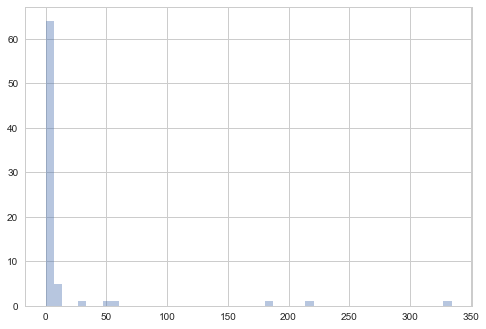

In [17]:
sns.distplot(s[s > 0.1], kde=False)

In [59]:
diff = rpca_alm.L - lowrank

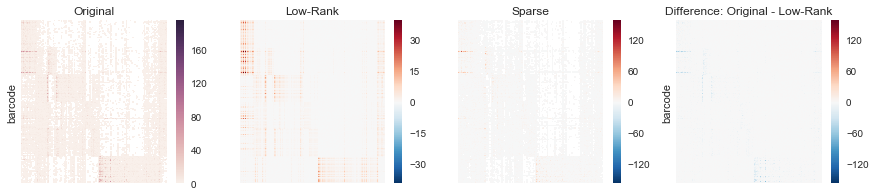

In [60]:
datasets = {'Original': lowrank, 'Low-Rank':rpca_alm.L, 'Sparse': rpca_alm.S, 
            'Difference: Original - Low-Rank': diff}

common.heatmaps(datasets)

In [61]:
L = pd.DataFrame(rpca_alm.L, index=lowrank.index, columns=lowrank.columns)
L.head()

,RHO,GNAT1,SLC24A1,PDE6B,PDC,CNGA1,RP1,SAG,NR2E3,NRL,...,SLC6A6,MAP1B,TMA7,STX3,SYT1,CRX,SNAP25,MPP4,NEUROD1,A930011O12RIK
barcode,,,,,,,,,,,,,,,,,,,,,
r1_TTCCTGCTAGGC,7.272295,3.048168,1.562439,2.198954,4.326513,1.385031,1.989380,6.541110,1.689744,1.345555,...,0.313114,0.767164,0.864139,0.388544,0.150222,0.752207,0.272070,0.832861,1.258661,0.856469
r1_TGGAGATACTCT,13.174154,5.480442,2.635686,3.713715,7.521109,2.310180,3.257731,11.804131,2.741139,2.363235,...,0.815807,1.031292,1.597556,0.999699,0.884529,1.033574,0.724387,1.236772,2.351665,1.286273
r1_CGTCTACATCCG,8.820288,3.785870,1.735920,2.396476,5.171789,1.561243,2.092837,7.836292,1.876383,1.537487,...,0.382253,0.972003,0.828423,0.656586,0.391978,0.916053,0.429003,0.958758,1.373776,0.703660
r1_CAAGCTTGGCGC,25.982230,11.021147,5.608453,7.951609,15.774301,4.953723,7.427482,24.229816,6.077871,4.769225,...,1.644721,3.139924,3.271503,2.906614,1.999058,2.751189,2.020806,3.190714,5.678790,3.812966
r1_ACTCACATAGAG,7.614892,3.096781,1.282597,1.838656,4.131712,1.165996,1.602792,6.662531,1.363853,1.237918,...,0.687691,0.804546,1.079846,0.874430,0.684653,0.541885,0.754388,0.499074,1.349995,0.391946


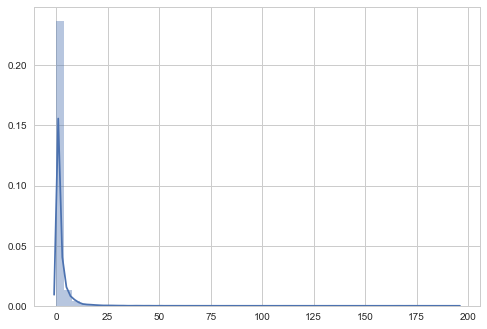

In [63]:
sns.distplot(lowrank.values.flat)

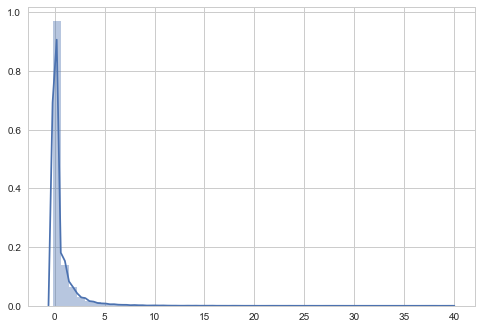

In [62]:
sns.distplot(L.values.flat)

In [74]:
lowrank_tidy = lowrank.unstack().reset_index()
lowrank_tidy['dataset'] = 'Original'
L_tidy = L.unstack().reset_index()
L_tidy['dataset'] = 'Low-Rank'

tidy = pd.concat([lowrank_tidy, L_tidy])
tidy = tidy.rename(columns={0: 'molecules'})
tidy.head()

,level_0,barcode,molecules,dataset
0,RHO,r1_TTCCTGCTAGGC,14.0,Original
1,RHO,r1_TGGAGATACTCT,23.0,Original
2,RHO,r1_CGTCTACATCCG,14.0,Original
3,RHO,r1_CAAGCTTGGCGC,62.0,Original
4,RHO,r1_ACTCACATAGAG,10.0,Original


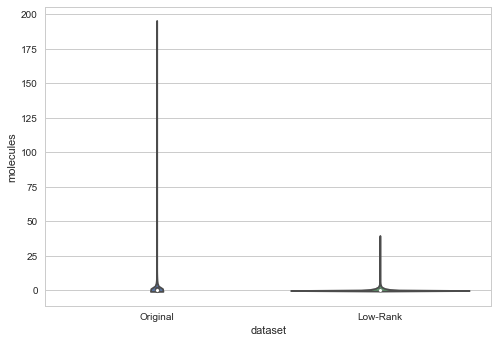

In [75]:
sns.violinplot(x='dataset', y='molecules', data=tidy)

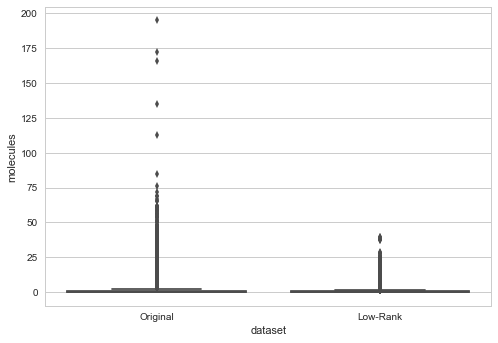

In [76]:
sns.boxplot(x='dataset', y='molecules', data=tidy)

In [37]:
S = pd.DataFrame(rpca_alm.S, index=lowrank.index, columns=lowrank.columns)
S.head()

,RHO,GNAT1,SLC24A1,PDE6B,PDC,CNGA1,RP1,SAG,NR2E3,NRL,...,SLC6A6,MAP1B,TMA7,STX3,SYT1,CRX,SNAP25,MPP4,NEUROD1,A930011O12RIK
barcode,,,,,,,,,,,,,,,,,,,,,
r1_TTCCTGCTAGGC,6.727705,-0.048168,-0.562439,0.801046,7.673487,-1.385031,-0.989380,0.458890,0.310256,0.654445,...,0.686886,0.232836,1.135861,-0.388544,-0.150222,-0.752207,-0.272070,0.167139,-1.258661,-0.856469
r1_TGGAGATACTCT,9.825846,2.519558,3.364314,0.286285,5.478891,6.689820,-1.257731,7.195869,-1.741139,-1.363235,...,2.184193,-1.031292,0.402444,-0.000000,-0.884529,-0.033574,-0.724387,0.763228,-2.351665,-0.286273
r1_CGTCTACATCCG,5.179712,0.214130,5.264080,-1.396476,0.828211,1.438757,-2.092837,5.163708,0.123617,0.462513,...,-0.382253,0.027997,-0.828423,2.343414,-0.391978,0.083947,-0.429003,1.041242,-1.373776,-0.703660
r1_CAAGCTTGGCGC,36.017770,6.978853,4.391547,12.048391,13.225699,-2.953723,0.572518,6.770184,2.922129,-2.769225,...,-1.644721,1.860076,3.728497,0.093386,-0.000000,3.248811,-0.020806,-0.190714,1.321210,7.187034
r1_ACTCACATAGAG,2.385108,-2.096781,-1.282597,-0.838656,0.868288,0.834004,-0.602792,0.337469,1.636147,-0.237918,...,0.312309,0.195454,0.920154,2.125570,0.315347,1.458115,0.245612,-0.499074,1.650005,-0.391946


In [21]:
diff.head()

,RHO,GNAT1,SLC24A1,PDE6B,PDC,CNGA1,RP1,SAG,NR2E3,NRL,...,SLC6A6,MAP1B,TMA7,STX3,SYT1,CRX,SNAP25,MPP4,NEUROD1,A930011O12RIK
barcode,,,,,,,,,,,,,,,,,,,,,
r1_TTCCTGCTAGGC,-6.727705,0.048168,0.562439,-0.801046,-7.673487,1.385031,0.989380,-0.458890,-0.310256,-0.654445,...,-0.686886,-0.232836,-1.135861,0.388544,0.150222,0.752207,0.272070,-0.167139,1.258661,0.856469
r1_TGGAGATACTCT,-9.825846,-2.519558,-3.364314,-0.286285,-5.478891,-6.689820,1.257731,-7.195869,1.741139,1.363235,...,-2.184193,1.031292,-0.402444,-0.000301,0.884529,0.033574,0.724387,-0.763228,2.351665,0.286273
r1_CGTCTACATCCG,-5.179712,-0.214130,-5.264080,1.396476,-0.828211,-1.438757,2.092837,-5.163708,-0.123617,-0.462513,...,0.382253,-0.027997,0.828423,-2.343414,0.391978,-0.083947,0.429003,-1.041242,1.373776,0.703660
r1_CAAGCTTGGCGC,-36.017770,-6.978853,-4.391547,-12.048391,-13.225699,2.953723,-0.572518,-6.770184,-2.922129,2.769225,...,1.644721,-1.860076,-3.728497,-0.093386,-0.000942,-3.248811,0.020806,0.190714,-1.321210,-7.187034
r1_ACTCACATAGAG,-2.385108,2.096781,1.282597,0.838656,-0.868288,-0.834004,0.602792,-0.337469,-1.636147,0.237918,...,-0.312309,-0.195454,-0.920154,-2.125570,-0.315347,-1.458115,-0.245612,0.499074,-1.650005,0.391946


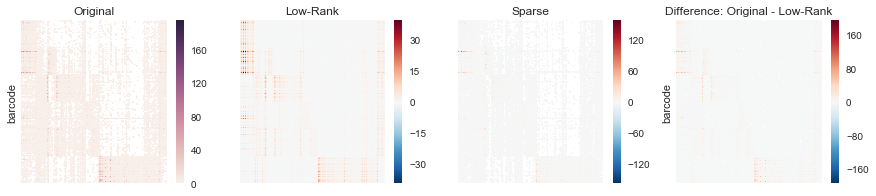

In [22]:
gr0 = rpca_alm.L > 0
diff_gr0 = lowrank - gr0

datasets = {'Original': lowrank, 'Low-Rank':rpca_alm.L, 'Sparse': rpca_alm.S, 
            'Difference: Original - Low-Rank': diff_gr0}

common.heatmaps(datasets)

/Users/olgabot/anaconda3/envs/cshl-sca-2017/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


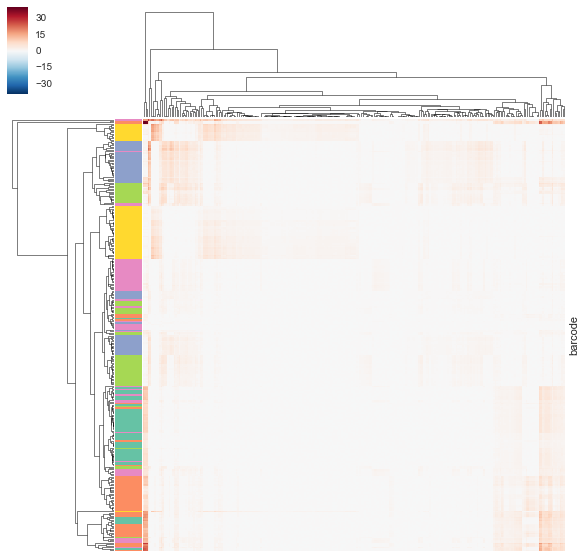

In [23]:
clustergrid = sns.clustermap(L, xticklabels=[], yticklabels=[], 
                             row_colors=color_labels)

/Users/olgabot/anaconda3/envs/cshl-sca-2017/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


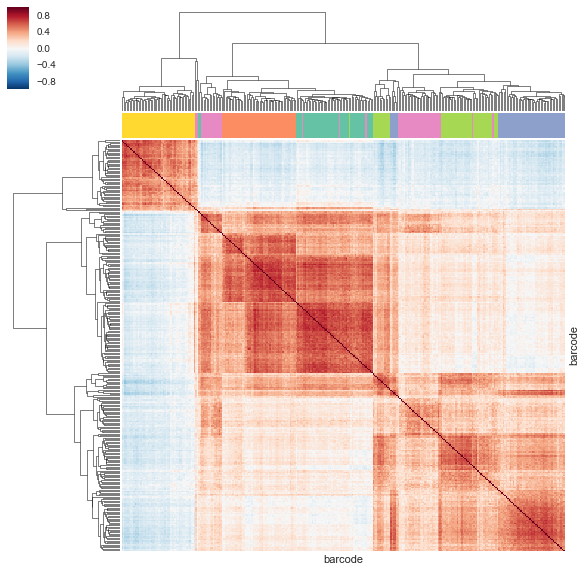

In [24]:
g_original = sns.clustermap(lowrank.T.corr(method='spearman'), xticklabels=[], yticklabels=[], 
                             col_colors=color_labels)

In [39]:
S.head()

,RHO,GNAT1,SLC24A1,PDE6B,PDC,CNGA1,RP1,SAG,NR2E3,NRL,...,SLC6A6,MAP1B,TMA7,STX3,SYT1,CRX,SNAP25,MPP4,NEUROD1,A930011O12RIK
barcode,,,,,,,,,,,,,,,,,,,,,
r1_TTCCTGCTAGGC,6.727705,-0.048168,-0.562439,0.801046,7.673487,-1.385031,-0.989380,0.458890,0.310256,0.654445,...,0.686886,0.232836,1.135861,-0.388544,-0.150222,-0.752207,-0.272070,0.167139,-1.258661,-0.856469
r1_TGGAGATACTCT,9.825846,2.519558,3.364314,0.286285,5.478891,6.689820,-1.257731,7.195869,-1.741139,-1.363235,...,2.184193,-1.031292,0.402444,-0.000000,-0.884529,-0.033574,-0.724387,0.763228,-2.351665,-0.286273
r1_CGTCTACATCCG,5.179712,0.214130,5.264080,-1.396476,0.828211,1.438757,-2.092837,5.163708,0.123617,0.462513,...,-0.382253,0.027997,-0.828423,2.343414,-0.391978,0.083947,-0.429003,1.041242,-1.373776,-0.703660
r1_CAAGCTTGGCGC,36.017770,6.978853,4.391547,12.048391,13.225699,-2.953723,0.572518,6.770184,2.922129,-2.769225,...,-1.644721,1.860076,3.728497,0.093386,-0.000000,3.248811,-0.020806,-0.190714,1.321210,7.187034
r1_ACTCACATAGAG,2.385108,-2.096781,-1.282597,-0.838656,0.868288,0.834004,-0.602792,0.337469,1.636147,-0.237918,...,0.312309,0.195454,0.920154,2.125570,0.315347,1.458115,0.245612,-0.499074,1.650005,-0.391946


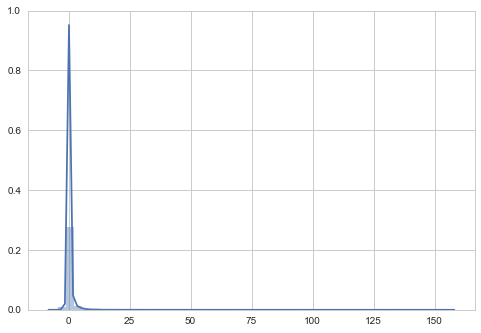

In [49]:
sns.distplot(S.values.flat)

In [52]:
np.median(S.values)

0.0

In [56]:
high_in_sparse = (S > 10).any()
print(high_in_sparse.sum())
S.loc[:, high_in_sparse]

88


,RHO,GNAT1,SLC24A1,PDE6B,PDC,CNGA1,RP1,SAG,NR2E3,NRL,...,TTYH1,PAX6,MGARP,HSP90AA1,SLC6A6,MAP1B,TMA7,SYT1,SNAP25,A930011O12RIK
barcode,,,,,,,,,,,,,,,,,,,,,
r1_TTCCTGCTAGGC,6.727705,-0.048168,-0.562439,0.801046,7.673487,-1.385031,-0.989380,0.458890,0.310256,0.654445,...,-0.000000,-0.000000,-0.302098,-0.081445,0.686886,0.232836,1.135861,-0.150222,-0.272070,-0.856469
r1_TGGAGATACTCT,9.825846,2.519558,3.364314,0.286285,5.478891,6.689820,-1.257731,7.195869,-1.741139,-1.363235,...,1.331571,0.998086,-1.093359,-1.256187,2.184193,-1.031292,0.402444,-0.884529,-0.724387,-0.286273
r1_CGTCTACATCCG,5.179712,0.214130,5.264080,-1.396476,0.828211,1.438757,-2.092837,5.163708,0.123617,0.462513,...,-0.341183,0.999751,1.902183,3.171176,-0.382253,0.027997,-0.828423,-0.391978,-0.429003,-0.703660
r1_CAAGCTTGGCGC,36.017770,6.978853,4.391547,12.048391,13.225699,-2.953723,0.572518,6.770184,2.922129,-2.769225,...,0.814278,0.000000,-1.179403,-0.254800,-1.644721,1.860076,3.728497,-0.000000,-0.020806,7.187034
r1_ACTCACATAGAG,2.385108,-2.096781,-1.282597,-0.838656,0.868288,0.834004,-0.602792,0.337469,1.636147,-0.237918,...,-0.082806,-0.000000,-0.509653,-0.000000,0.312309,0.195454,0.920154,0.315347,0.245612,-0.391946
r1_TAACGGACACGC,21.380107,1.663735,-0.021046,-0.222488,12.299926,4.287691,-0.672176,0.000000,-2.237709,9.267142,...,4.740199,0.000000,0.000000,-0.000000,0.952529,-1.441017,-0.406451,1.892411,-1.088772,0.354429
r1_CGCATGGGATAC,13.959024,3.970865,-1.348141,-0.892688,2.954439,-0.215551,1.402263,-0.000000,-0.442402,5.729592,...,2.569047,0.000000,-0.719147,1.672199,0.435023,1.349910,-0.755655,-0.504931,0.403079,-0.428073
r1_TAACGACGCTTG,3.180794,-0.447518,0.109158,-0.257555,-2.279500,0.203602,3.582963,2.171476,-0.986389,0.327993,...,-0.133089,-0.000000,-0.236654,0.158758,-0.000000,0.434394,-0.410368,-0.045431,0.000000,2.149970
r1_TCGGCAGCCTCT,0.000000,6.456903,-1.145033,1.899016,0.735434,1.092624,0.135634,9.117565,0.692410,2.080789,...,-0.266130,0.000000,0.000000,-0.887233,-0.409884,-1.027818,-0.134590,-0.516927,-0.389400,-1.188493


/Users/olgabot/anaconda3/envs/cshl-sca-2017/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


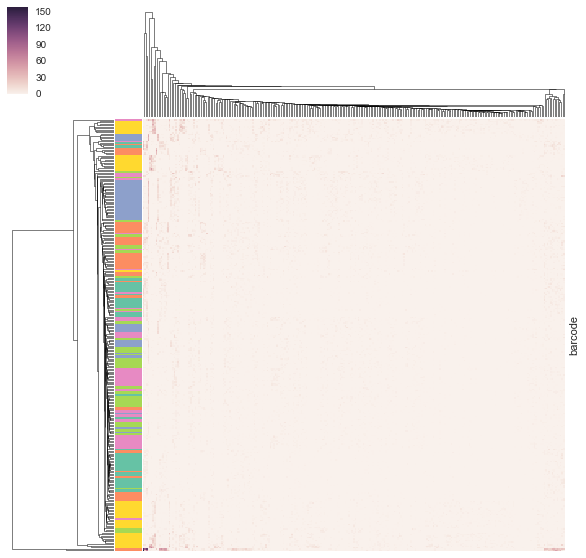

In [47]:

data = S[S > 0]
data = data.fillna(0)

g_rpca = sns.clustermap(data, xticklabels=[], yticklabels=[], row_colors=color_labels)


/Users/olgabot/anaconda3/envs/cshl-sca-2017/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


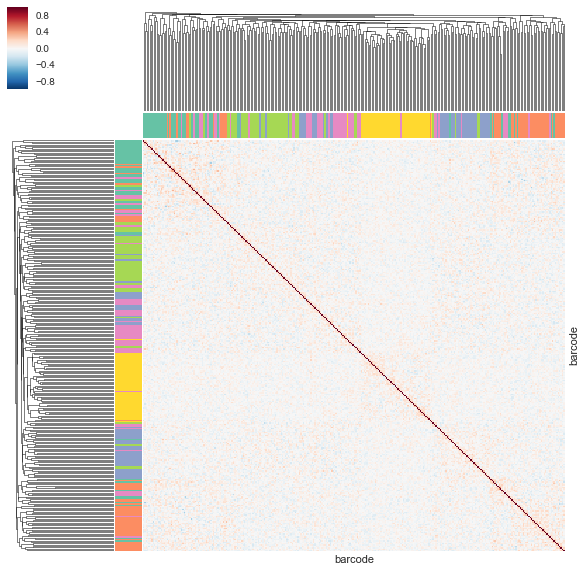

In [38]:

data = S.T.corr(method='spearman')
g_rpca = sns.clustermap(data, xticklabels=[], yticklabels=[],
                             col_colors=color_labels, row_colors=color_labels)


/Users/olgabot/anaconda3/envs/cshl-sca-2017/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


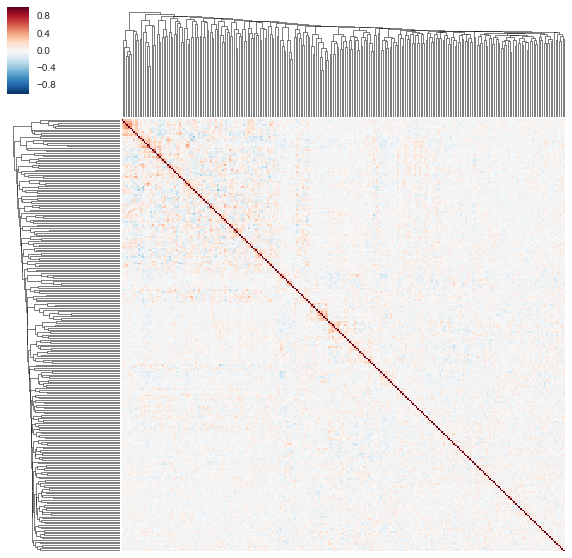

In [44]:

data = S.corr(method='spearman')
g_rpca = sns.clustermap(data, xticklabels=[], yticklabels=[])


/Users/olgabot/anaconda3/envs/cshl-sca-2017/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


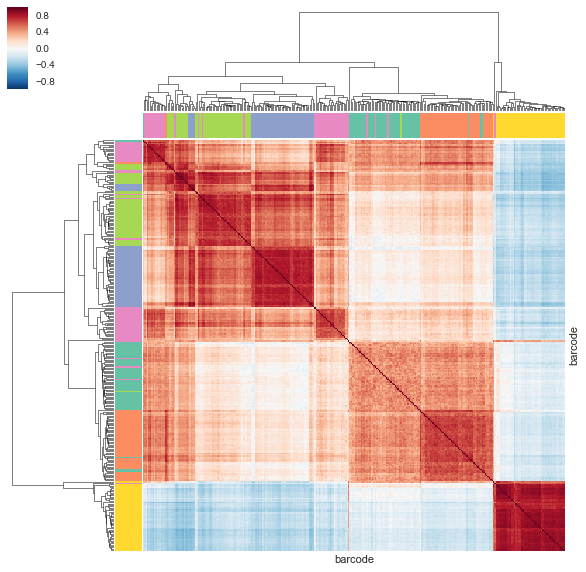

In [25]:

data = L.T.corr(method='spearman')
g_rpca = sns.clustermap(data, xticklabels=[], yticklabels=[],
                             col_colors=color_labels, row_colors=color_labels)


So this seemed to have flipped some of the cells into different types, and made the within-cluster distances smaller

/Users/olgabot/anaconda3/envs/cshl-sca-2017/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


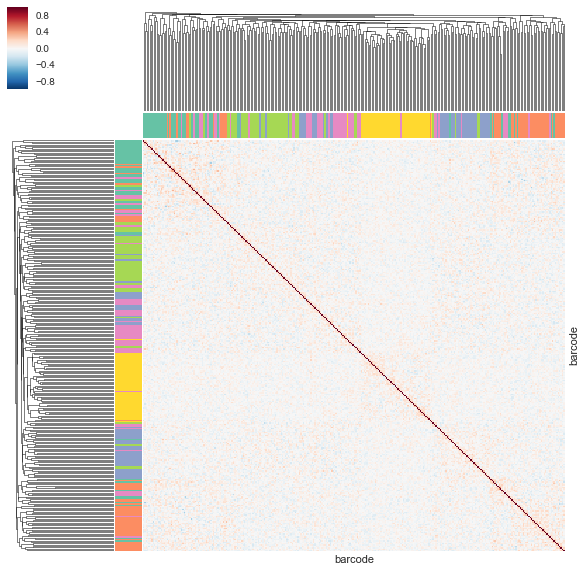

In [45]:
reconstructed = L + S

data = reconstructed.T.corr(method='spearman')
g_rpca = sns.clustermap(data, xticklabels=[], yticklabels=[],
                             col_colors=color_labels, row_colors=color_labels)


In [81]:
csv = os.path.join(data_folder, 'sparse.csv')

S.to_csv(csv)

In [82]:
csv = os.path.join(data_folder, 'lowrank.csv')

L.to_csv(csv)

## Try ICA before and after

In [79]:
L.shape

(300, 259)

In [ ]:
from sklearn.decomposition import ICA

ica = ICA(n_components=)

## ADMM implementation

In [36]:
reduced = rpcaADMM.rpcaADMM(lowrank)
# print(reduced.shape)
# reduced.head()


iter	    r norm	   eps pri	    s norm	  eps dual	 objective
   1	  386.9989	    5.6518	  560.3478	    5.5259	  46003.39
  10	  126.6648	    7.4377	   57.8995	    7.7838	 274951.69
  20	   19.5261	    7.9579	   26.0279	    7.5066	 297640.42
  30	   10.9950	    8.0745	   10.9821	    7.3901	 300438.68


In [62]:
rpcaADMM.rpcaADMM()

In [38]:
reduced.keys()

dict_keys(['objval', 'r_norm', 's_norm', 'eps_pri', 'eps_dual', 'addm_toc', 'admm_iter', 'X1_admm', 'X2_admm', 'X3_admm'])

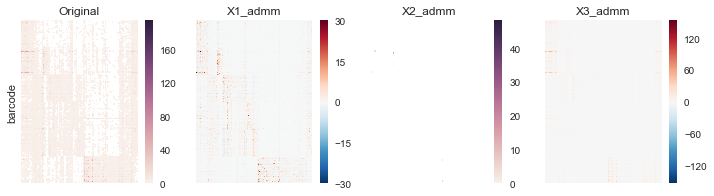

In [76]:
ncols = 4
nrows = 1

axsize = 3

width = ncols * axsize
height = nrows * axsize

fig, axes = plt.subplots(ncols=ncols, figsize=(width, height))
axes_iter = axes.flat

x_keys = [key for key in reduced if key.startswith('X')]

ax = next(axes_iter)
data = lowrank
mask = data == 0
sns.heatmap(lowrank, mask=mask, ax=ax, xticklabels=[], yticklabels=[])
ax.set(title='Original')

for ax, key in zip(axes_iter, x_keys):
    data = reduced[key]
    mask = data == 0
    
    vmin = data.min().min()
    vmax = data.max().max()
    center = 0
    sns.heatmap(reduced[key], mask=mask, ax=ax, xticklabels=[], yticklabels=[])
    ax.set(title=key)
    


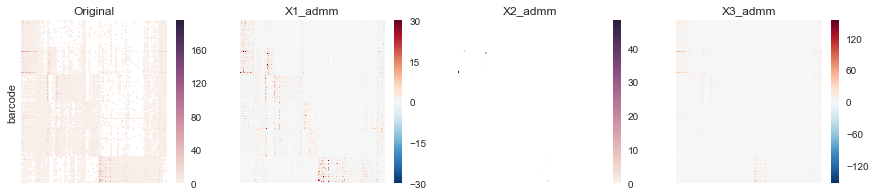

In [79]:
ncols = 4
nrows = 1

axsize = 3

width = ncols * axsize * 1.25
height = nrows * axsize

fig, axes = plt.subplots(ncols=ncols, figsize=(width, height))
axes_iter = axes.flat

x_keys = [key for key in reduced if key.startswith('X')]

ax = next(axes_iter)
common.heatmap(lowrank, ax=ax)
ax.set(title='Original')

for ax, key in zip(axes_iter, x_keys):
    common.heatmap(reduced[key], ax=ax)
    ax.set(title=key)
    


In [55]:
U, s, V = np.linalg.svd(reduced['X3_admm'])

In [61]:
reduced['X2_admm'][reduced['X2_admm'].nonzero()]

array([  0.06196856,   6.6911438 ,  13.40747184,   0.27285075,
        48.22056903,   2.24481196,   2.75026673,   0.05984601,   6.10384102])

In [80]:
ax

[autoreload of common failed: Traceback (most recent call last):
  File "/Users/olgabot/anaconda3/envs/cshl-sca-2017/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 246, in check
    superreload(m, reload, self.old_objects)
  File "/Users/olgabot/anaconda3/envs/cshl-sca-2017/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 369, in superreload
    module = reload(module)
  File "/Users/olgabot/anaconda3/envs/cshl-sca-2017/lib/python3.6/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/Users/olgabot/anaconda3/envs/cshl-sca-2017/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 608, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstrap_external>", line 741, in source_to_code
  File "<frozen importlib._boot

In [81]:
sns.heatmap??